# Team 1 Project 1 - Free Throws
### Due: Tuesday, Feb 11

## Assignment Details
Pick one of the datasets listed below. Then, do the following:
- Load it into a notebook using Pandas
- Find anything in it that needs to be cleaned. This could include rows with missing data, columns with data stored as the wrong type, dates that are stored as strings instead of dates, and more.
- Create the following items:
    - **A presentation:** Your presentation should be approximately 10 minutes in length, and cover the main topics. You can save code and nitty-gritty details for your notebook.
    - **A Jupyter notebook:** The notebook should include a mixture of Markdown cells describing your work, and code. There should be no scratch work, everything should be easy to read.
    - **An article on your LinkedIn page:** This should be comprehensible by a general, non-data science audience. Include graphs to back up your results. Include a link to your Github repository for this project.
- Each person on the team should create a new Github repository. It should have the following:
    - A nice title. Don't call it "Project 1". Make it something interesting so that someone not in this class would want to see what you did.
    - A README file explaining what you're doing. Make it look nice, use Markdown.
    - A folder titled `data` for your data. In this folder you should put the data. Also, once you've cleaned your data, include another file `cleaned_data.csv` which is the cleaned data.
    - A folder titled `notebooks` for your notebook. Give your notebook a nice filename.
    - A folder titled `presentations` for your presentation. Give your presentation a nice filename.
    - A folder titled `articles` for your LinkedIn article. 
- Fill out the [proposal template](Project%201/proposal_template.ipynb) and slack it to me. Your proposal is due Friday, Jan 14 by midnight.

You can see an example project in `Projects/example_project/`.

## Tasks:
- **Free throws:** Use the free throws dataset in `data/free_throws.csv` to address the following questions:
    - What is the impact of home vs away on free throws?
    - What is the impact of playoffs on free throws?
    - What is the impact of how far into the game we are (in minute) on free throws?
    - Which players seem to be especially consistent in all situations? Meaning they always make/miss at about the same rate, regardless of any factors.
    - How important are free throws in terms of winning/losing the game?

# Imports & Data Loading
Standard stuff, just importing the csv file from google drive.

In [1]:
import pandas as pd
from google.colab import drive
from matplotlib import pyplot as plt
import numpy as np

drive.mount('/content/drive')
drive_dir = '/content/drive/My Drive/MATH_3439/'

Mounted at /content/drive


In [2]:
# Dataframe as a variable "df"
df = pd.read_csv(drive_dir + 'data/free_throws.csv')

# column "game_id" was missing originally; these lines add it back.
df['game_id'] = df.groupby(["home_team", "visit_team", "home_final_score", "visit_final_score", "season_start"]).ngroup()
first_column = df.pop("game_id")
df.insert(0, "game_id", first_column)

# Understanding The Data
Taking a look at the head and understanding what each column represents.

### Data description

This data is all the free throws taken in the NBA between 2006 and 2016. The columns that we are interested in are:
- **game_id**: The unique ID for each game. The number itself doesn't mean anything, but if two rows have the same game_id, then that means they occurred in the same game.
- **period**: Which period the free throw occurred in (there are four periods in basketball).
- **player**: The player's name
- **playoffs**: 0 = not in playoffs, 1 = in playoffs
- **shot_made**: 0 = shot not made, 1 = shot made
- **home_team**: Abbreviated name of the home team (the team whose city the game was played in)
- **visit_team**: Abbreviated name of the visiting team
- **home_score**: The home team's score in the game when the free throw was taken
- **visit_score**: The visiting team's score in the game when the free throw was taken
- **final_score**: The final score in the game
- **minutes**: How many minutes into the game when the free throw was taken. An NBA game is 48 minutes long (not counting a potential overtime).
- **season_start**: What year the season started in (seasons start in one year and finish the following year)
- **shot_count**: Some times a player is awarded more than one free throw. A 1 indicates this is their first shot, a 2 indicates this is their second. They can get a maximum of 3 shots.

In [3]:
print(f"Rows: {df.shape[0]}\nColumns: {df.shape[1]}")
df.head(10)

Rows: 618019
Columns: 14


,game_id,period,player,playoffs,shot_made,home_team,visit_team,home_score,visit_score,home_final_score,visit_final_score,minutes,season_start,shot_count
0,5711,1,Andrew Bynum,0,1,LAL,PHX,1,0,114,106,47.000000,2006,1
1,5711,1,Andrew Bynum,0,1,LAL,PHX,2,0,114,106,47.000000,2006,2
2,5711,1,Andrew Bynum,0,1,LAL,PHX,12,18,114,106,29.733333,2006,1
3,5711,1,Andrew Bynum,0,0,LAL,PHX,12,18,114,106,29.733333,2006,2
4,5711,1,Shawn Marion,0,1,LAL,PHX,12,21,114,106,29.200000,2006,1
5,5711,1,Amare Stoudemire,0,1,LAL,PHX,20,33,114,106,13.000000,2006,1
6,5711,1,Amare Stoudemire,0,1,LAL,PHX,20,34,114,106,13.000000,2006,2
7,5711,2,Leandro Barbosa,0,0,LAL,PHX,29,43,114,106,43.466667,2006,1
8,5711,2,Leandro Barbosa,0,1,LAL,PHX,29,44,114,106,43.466667,2006,2
9,5711,2,Lamar Odom,0,1,LAL,PHX,30,44,114,106,42.466667,2006,1


# Data Cleaning
Removing any unwanted/corrupted data from the dataframe.

There seems to be no missing data in this data set, as nothing is missing from any column.

However, there might still be some invalid values in the columns. Nothing has been done about this at this time.


In [4]:
# for col in df.columns:
#   missing_amt = df[col].isna().sum()
#   total_vals = df.shape[0]
#   missing_pct = missing_amt / total_vals * 100
#   print(f'{col}: {missing_amt} ({missing_pct:.2f}%) missing values')
df.isna().sum()

game_id              0
period               0
player               0
playoffs             0
shot_made            0
home_team            0
visit_team           0
home_score           0
visit_score          0
home_final_score     0
visit_final_score    0
minutes              0
season_start         0
shot_count           0
dtype: int64

# Data Exploration
Currently contains all series and dataframes pertaining to their respective
titles.

## Data Exploration: Other Useful Dataframes

Here is a dataframe containing one free throw from each unique game and extra columns stating whether or not a team won the game:

In [5]:
df_unique_games = df.drop_duplicates("game_id")
df_unique_games["home_team_won"] = df_unique_games["home_final_score"] > df_unique_games["visit_final_score"]
df_unique_games["visit_team_won"] = df_unique_games["visit_final_score"] > df_unique_games["home_final_score"]
df_unique_games.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,game_id,period,player,playoffs,shot_made,home_team,visit_team,home_score,visit_score,home_final_score,visit_final_score,minutes,season_start,shot_count,home_team_won,visit_team_won
0,5711,1,Andrew Bynum,0,1,LAL,PHX,1,0,114,106,47.000000,2006,1,True,False
41,6342,1,Ben Gordon,0,1,MIA,CHI,0,1,66,108,46.266667,2006,1,False,True
95,894,1,Wally Szczerbiak,0,0,BOS,NO,2,8,87,91,33.200000,2006,1,False,True
167,2356,1,Drew Gooden,0,0,CLE,WSH,10,6,97,94,32.466667,2006,1,True,False
226,3453,1,Richard Hamilton,0,0,DET,MIL,0,4,97,105,43.933333,2006,1,False,True


Here is a dataframe containing one free throw from each unique game and extra columns stating whether or not a team won the game:(edit later)

In [6]:
df_unique_games_players = df.drop_duplicates(["game_id", "player"])
df_unique_games_players["home_team_won"] = df_unique_games_players["home_final_score"] > df_unique_games_players["visit_final_score"]
df_unique_games_players["visit_team_won"] = df_unique_games_players["visit_final_score"] > df_unique_games_players["home_final_score"]
df_unique_games_players.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,game_id,period,player,playoffs,shot_made,home_team,visit_team,home_score,visit_score,home_final_score,visit_final_score,minutes,season_start,shot_count,home_team_won,visit_team_won
0,5711,1,Andrew Bynum,0,1,LAL,PHX,1,0,114,106,47.000000,2006,1,True,False
4,5711,1,Shawn Marion,0,1,LAL,PHX,12,21,114,106,29.200000,2006,1,True,False
5,5711,1,Amare Stoudemire,0,1,LAL,PHX,20,33,114,106,13.000000,2006,1,True,False
7,5711,2,Leandro Barbosa,0,0,LAL,PHX,29,43,114,106,43.466667,2006,1,True,False
9,5711,2,Lamar Odom,0,1,LAL,PHX,30,44,114,106,42.466667,2006,1,True,False


## Data Exploration: Players

### Series

#### For Dataframe

In [7]:
# test = df.groupby(["player", "season_start"]).size()
# test[:20]

 Series showing players in terms of number of free throws taken:

In [8]:
# Or use: df["player"].value_counts()
series_ptaken = df.groupby(["player", "season_start"]).size()
series_ptaken[:5]

player      season_start
A.J. Price  2009            75
            2010            91
            2011            35
            2012            62
            2013             2
dtype: int64

Series showing players in terms of number of free throws made:

In [9]:
series_pmade = df.groupby(["player", "season_start"])["shot_made"].sum()
series_pmade[:5]

player      season_start
A.J. Price  2009            60
            2010            63
            2011            28
            2012            49
            2013             0
Name: shot_made, dtype: int64

Series showing players in terms of number of games played:

In [10]:
series_pgames = df_unique_games_players.groupby(["player", "season_start"]).size()
series_pgames[:5]

player      season_start
A.J. Price  2009            30
            2010            36
            2011            14
            2012            21
            2013             2
dtype: int64

Series showing players in terms of number of games won as home team:

In [11]:
series_phwon = df_unique_games_players.groupby(["player", "season_start"])["home_team_won"].sum()
series_phwon[:5]

player      season_start
A.J. Price  2009            24
            2010            26
            2011             7
            2012            17
            2013             1
Name: home_team_won, dtype: int64

Series showing players in terms of number of games won as visting team:

In [12]:
series_pvwon = df_unique_games_players.groupby(["player", "season_start"])["visit_team_won"].sum()
series_pvwon[:5]

player      season_start
A.J. Price  2009             6
            2010            10
            2011             7
            2012             4
            2013             1
Name: visit_team_won, dtype: int64

#### For Graphing

In [13]:
# Or use: df["player"].value_counts()
series1_ptaken = df.groupby("player").size()
series1_pmade = df.groupby("player")["shot_made"].sum()
series1_pgames = df_unique_games_players.groupby("player").size()
series1_phwon = df_unique_games_players.groupby("player")["home_team_won"].sum()
series1_pvwon = df_unique_games_players.groupby("player")["visit_team_won"].sum()

player_stats_dict_single = {
    "taken": series1_ptaken,
    "made": series1_pmade,
    "games": series1_pgames,
    # "h_won": series_phwon,
    # "v_won": series_pvwon
}
df_pstats_single = pd.DataFrame.from_dict(player_stats_dict_single)
df_pstats_single.reset_index(level=0, inplace=True)
# df_pstats_single.reset_index(level=0, inplace=True)
# df_pstats["won"] = df_pstats["h_won"] + df_pstats["v_won"]
df_pstats_single["pct_made"] = df_pstats_single["made"] / df_pstats_single["taken"]
df_pstats_single["gtr_avg"] = df_pstats_single["pct_made"] > df_pstats_single["pct_made"].mean()

df_pstats_single = df_pstats_single[df_pstats_single["taken"] >= 50]
df_pstats_single.head()

,player,taken,made,games,pct_made,gtr_avg
0,A.J. Price,282,211,109,0.748227,True
1,Aaron Brooks,1109,928,343,0.836790,True
2,Aaron Gordon,254,173,78,0.681102,False
3,Aaron Gray,339,189,136,0.557522,False
6,Acie Law,229,179,78,0.781659,True


### Dataframe

Creating dataframe containing stats pertaining to each player:

In [14]:
player_stats_dict = {
    "taken": series_ptaken,
    "made": series_pmade,
    "games": series_pgames,
    # "h_won": series_phwon,
    # "v_won": series_pvwon
}
df_pstats = pd.DataFrame.from_dict(player_stats_dict)
df_pstats.reset_index(level=0, inplace=True)
df_pstats.reset_index(level=0, inplace=True)
# df_pstats["won"] = df_pstats["h_won"] + df_pstats["v_won"]
df_pstats["pct_made"] = df_pstats["made"] / df_pstats["taken"]
df_pstats["gtr_avg"] = df_pstats["pct_made"] > df_pstats["pct_made"].mean()

#### Data Description
Here is what each column represents:
- **season_start**: The year of the starting season.
- **player**: The player's name.
- **taken**: The amount of shots taken by the player.
- **made**: The amount of shots made by the player.
- **games**: The amount of unique games this player appeared in.
- **pct_made**: The percentage of shots made vs thrown.
- **gtr_avg**: Whether the **pct_made** value was higher than the average of all values in that column.

In [15]:
print(f"Rows: {df_pstats.shape[0]}\nColumns: {df_pstats.shape[1]}")
df_pstats.head(20)

Rows: 4526
Columns: 7


,season_start,player,taken,made,games,pct_made,gtr_avg
0,2009,A.J. Price,75,60,30,0.800000,True
1,2010,A.J. Price,91,63,36,0.692308,False
2,2011,A.J. Price,35,28,14,0.800000,True
3,2012,A.J. Price,62,49,21,0.790323,True
4,2013,A.J. Price,2,0,2,0.000000,False
5,2014,A.J. Price,17,11,6,0.647059,False
6,2007,Aaron Brooks,60,51,23,0.850000,True
7,2008,Aaron Brooks,218,186,64,0.853211,True
8,2009,Aaron Brooks,298,245,75,0.822148,True
9,2010,Aaron Brooks,140,124,43,0.885714,True


Preparing a dataframe for the graph below.

In [16]:
dict_pstats_merge = {
    "player": [],
    "min_year_pct": [],
    "max_year_pct": []
}
for player_name in df_pstats["player"].unique():
  dfp = df_pstats[df_pstats["player"] == player_name]
  dict_pstats_merge["player"].append(player_name)
  dict_pstats_merge["min_year_pct"].append(dfp[dfp["season_start"] == dfp["season_start"].min()]["pct_made"].min())
  dict_pstats_merge["max_year_pct"].append(dfp[dfp["season_start"] == dfp["season_start"].max()]["pct_made"].min())
df_pstats_merge = pd.DataFrame.from_dict(dict_pstats_merge)
df_pstats_merge["min_max_diff"] = df_pstats_merge["max_year_pct"] - df_pstats_merge["min_year_pct"]
df_pstats_merge

,player,min_year_pct,max_year_pct,min_max_diff
0,A.J. Price,0.800000,0.647059,-0.152941
1,Aaron Brooks,0.850000,0.774194,-0.075806
2,Aaron Gordon,0.721311,0.668394,-0.052918
3,Aaron Gray,0.565657,0.550000,-0.015657
4,Aaron Harrison,0.416667,0.416667,0.000000
...,...,...,...,...
1093,Zach LaVine,0.841808,0.793103,-0.048704
1094,Zach Randolph,0.820513,0.798206,-0.022307
1095,Zaza Pachulia,0.787466,0.774744,-0.012722
1096,Zoran Dragic,0.600000,0.600000,0.000000


In [17]:
df_pstats_temp = pd.merge(df_pstats_single, df_pstats_merge, on="player", how="left")
df_pstats_temp

,player,taken,made,games,pct_made,gtr_avg,min_year_pct,max_year_pct,min_max_diff
0,A.J. Price,282,211,109,0.748227,True,0.800000,0.647059,-0.152941
1,Aaron Brooks,1109,928,343,0.836790,True,0.850000,0.774194,-0.075806
2,Aaron Gordon,254,173,78,0.681102,False,0.721311,0.668394,-0.052918
3,Aaron Gray,339,189,136,0.557522,False,0.565657,0.550000,-0.015657
4,Acie Law,229,179,78,0.781659,True,0.800000,0.734375,-0.065625
...,...,...,...,...,...,...,...,...,...
785,Yi Jianlian,574,447,164,0.778746,True,0.841379,0.636364,-0.205016
786,Zach LaVine,380,310,107,0.815789,True,0.841808,0.793103,-0.048704
787,Zach Randolph,3415,2613,650,0.765154,True,0.820513,0.798206,-0.022307
788,Zaza Pachulia,2038,1533,526,0.752208,True,0.787466,0.774744,-0.012722


In [18]:
df_pstats_temp = df_pstats_temp[df_pstats_temp["taken"] >= 50]
df_pstats_temp["min_max_diff"].mean()

-0.003957404038512577

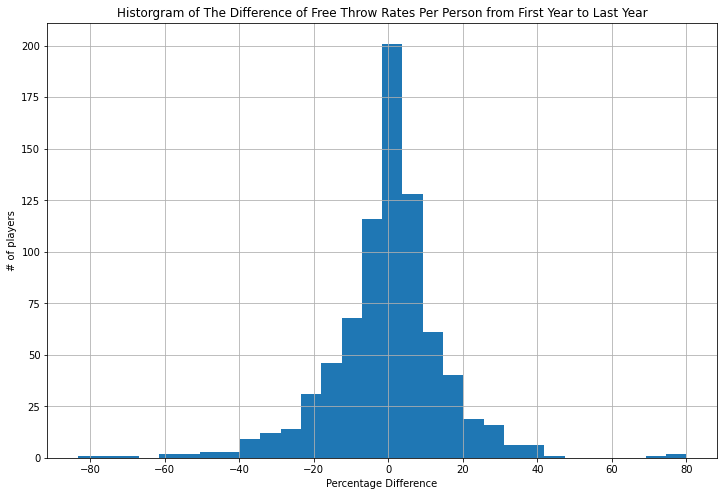

In [19]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.hist(df_pstats_temp["min_max_diff"]*100, bins=30)

plt.title("Historgram of The Difference of Free Throw Rates Per Person from First Year to Last Year")
plt.xlabel("Percentage Difference")
plt.ylabel("# of players")

plt.grid()
plt.show()

### Other Stuff

Select a subset by player name

In [20]:
def cgraph(player_list, axis1, axis2):
  fig, ax = plt.subplots(figsize=(12, 8))
  for player_name in player_list:
    pdf = df_pstats[df_pstats["player"] == player_name]
    ax.plot(pdf[axis1], pdf[axis2])

  plt.title(f"Line graph of '{axis1}' vs '{axis2}'")
  plt.xlabel(f"{axis1}")
  plt.ylabel(f"{axis2}")

  plt.legend(player_list)

  plt.grid()
  plt.show()

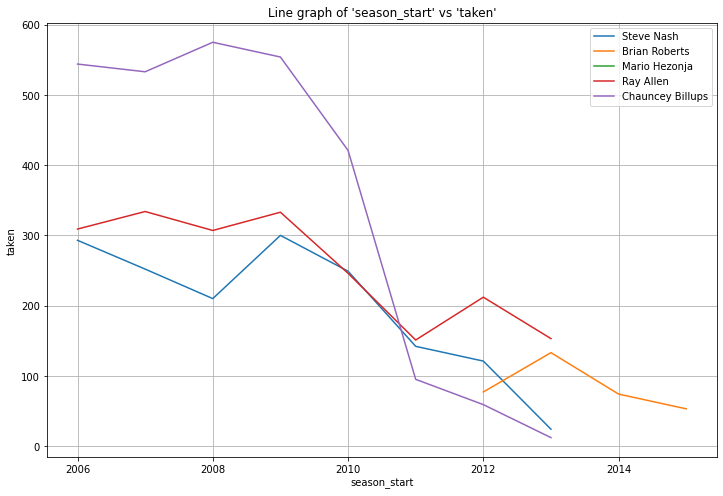

In [21]:
df_pstats_single = df_pstats_single.sort_values(by="pct_made", ascending=False)
list_players = df_pstats_single["player"]
cgraph(list_players[:5], "season_start", "taken")

In [22]:
df_pstats_single

,player,taken,made,games,pct_made,gtr_avg
977,Steve Nash,1591,1454,443,0.913891,True
129,Brian Roberts,337,307,127,0.910979,True
715,Mario Hezonja,54,49,24,0.907407,True
867,Ray Allen,2045,1847,557,0.903178,True
165,Chauncey Billups,2793,2518,443,0.901540,True
...,...,...,...,...,...,...
42,Andre Drummond,1459,552,261,0.378341,False
192,Clint Capela,268,101,79,0.376866,False
532,Joey Dorsey,162,61,57,0.376543,False
158,Cedric Simmons,57,21,20,0.368421,False


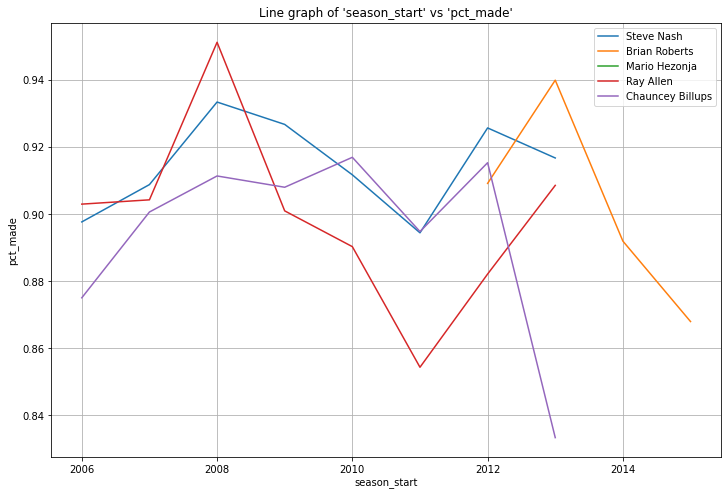

In [23]:
df_pstats_single = df_pstats_single.sort_values(by="pct_made", ascending=False)
list_players = df_pstats_single["player"]
cgraph(list_players[:5], "season_start", "pct_made")

The number on the right indicates how many years (out of 10) they played in a season.

In [24]:
df_pstats.groupby("player").size().sort_values(ascending=False)

player
C.J. Miles        10
Matt Barnes       10
Rudy Gay          10
Dwight Howard     10
Chuck Hayes       10
                  ..
Rob Kurz           1
Bracey Wright      1
Kevin Jones        1
Dennis Horner      1
Guillermo Diaz     1
Length: 1098, dtype: int64

In [25]:
# for name, data in df_pstats.groupby("player"):

# Data Visualization
Currently uses most findings from the data exploration tab to plot data.

## Data Visualization: Players

### Plots

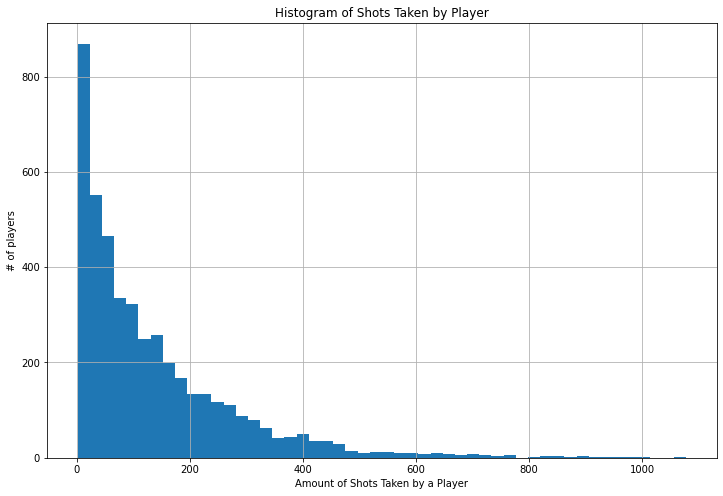

In [26]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.hist(df_pstats["taken"], bins=50)

plt.title("Histogram of Shots Taken by Player")
plt.xlabel("Amount of Shots Taken by a Player")
plt.ylabel("# of players")

plt.grid()
plt.show()

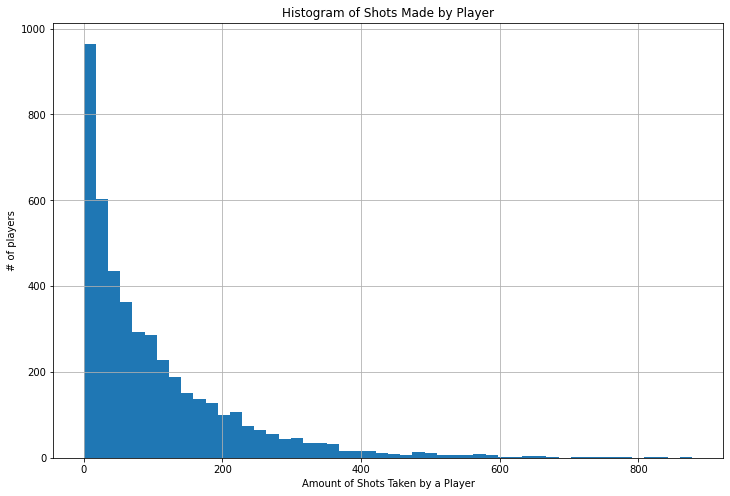

In [27]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.hist(df_pstats["made"], bins=50)

plt.title("Histogram of Shots Made by Player")
plt.xlabel("Amount of Shots Taken by a Player")
plt.ylabel("# of players")

plt.grid()
plt.show()

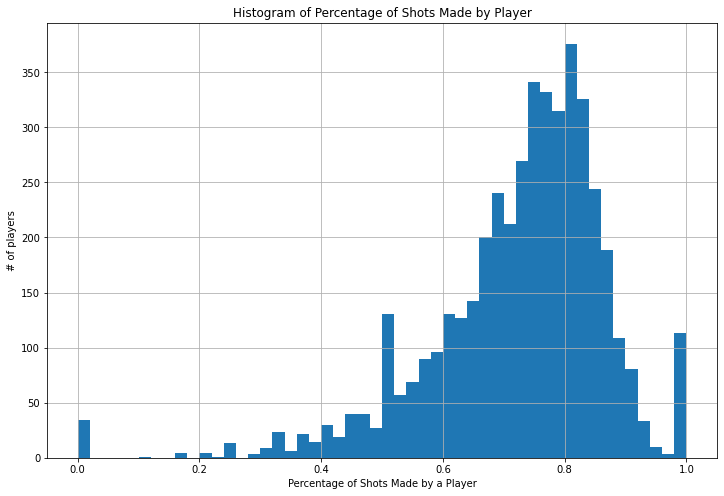

In [28]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.hist(df_pstats["pct_made"], bins=50)

plt.title("Histogram of Percentage of Shots Made by Player")
plt.xlabel("Percentage of Shots Made by a Player")
plt.ylabel("# of players")

plt.grid()
plt.show()

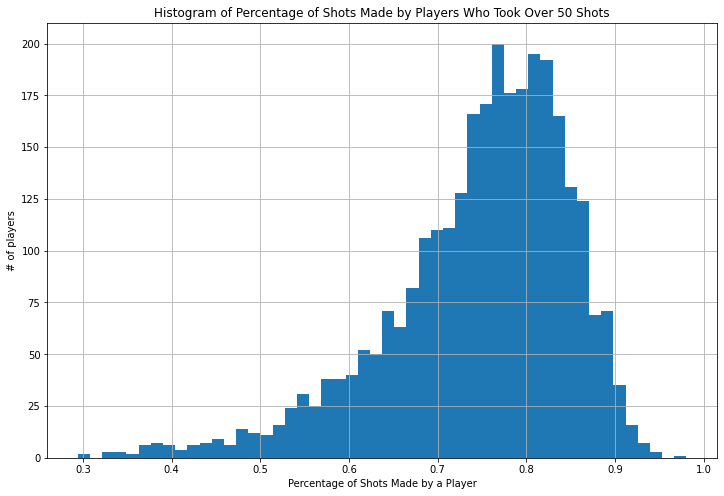

In [29]:
df_pstats_took_50 = df_pstats[df_pstats["taken"] >= 50]

fig, ax = plt.subplots(figsize=(12, 8))
ax.hist(df_pstats_took_50["pct_made"], bins=50)

plt.title("Histogram of Percentage of Shots Made by Players Who Took Over 50 Shots")
plt.xlabel("Percentage of Shots Made by a Player")
plt.ylabel("# of players")

plt.grid()
plt.show()

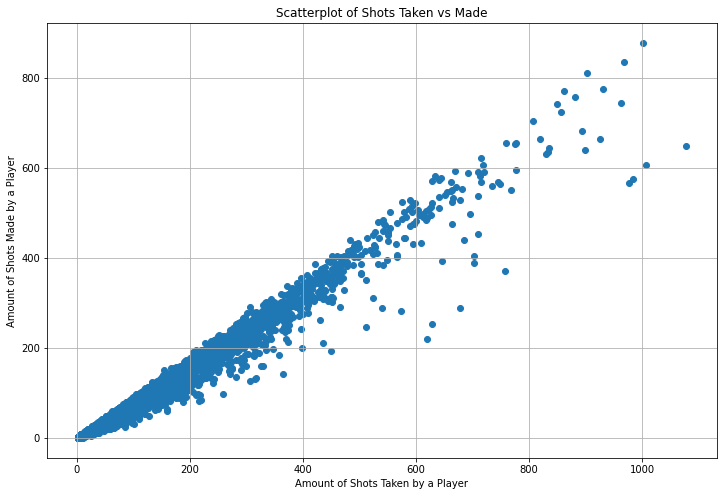

In [30]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(df_pstats["taken"], df_pstats["made"])

plt.title("Scatterplot of Shots Taken vs Made")
plt.xlabel("Amount of Shots Taken by a Player")
plt.ylabel("Amount of Shots Made by a Player")

plt.grid()
plt.show()

Playoffs vs. Free Throws Made

In [31]:
df_marci = pd.read_csv("/content/drive/MyDrive/data_science_notebooks/data_ross/free_throw.csv")
df_marci.columns

Index(['period', 'player', 'playoffs', 'shot_made', 'home_team', 'visit_team',
       'home_score', 'visit_score', 'home_final_score', 'visit_final_score',
       'minutes', 'season_start', 'shot_count', 'home_team_won',
       'shots_made_overall', 'shots_taken_overall', 'percent_made',
       'shots_made_this_year', 'shots_taken_this_year',
       'percent_made_this_year', 'shots_taken_this_period',
       'shots_made_this_period', 'percent_made_this_period',
       'shots_taken_playoff', 'shots_made_playoff', 'percent_made_playoff'],
      dtype='object')

In [32]:
df_marci["playoffs"].unique()

array([0, 1])

In [33]:
not_playoffs = df_marci[df_marci["playoffs"] == 0]["percent_made"].mean()

In [34]:
playoffs = df_marci[df_marci["playoffs"] == 1]["percent_made"].mean()
playoff_array = [not_playoffs, playoffs]

In [35]:
playoffs

76.2123645729418

In [36]:
not_playoffs

75.63629069984322

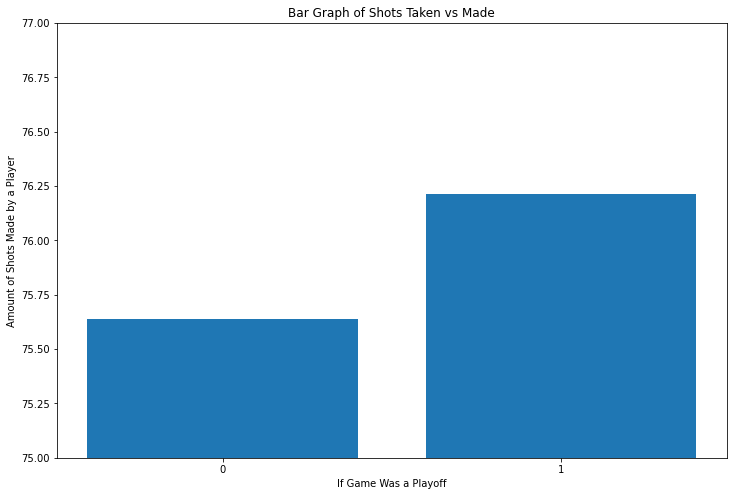

In [37]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(df_marci["playoffs"].unique(), playoff_array)

plt.title("Bar Graph of Shots Taken vs Made")
plt.xlabel("If Game Was a Playoff")
plt.ylabel("Amount of Shots Made by a Player")
plt.ylim(75, 77)
plt.xticks([0, 1])

# plt.grid()
plt.show()

Stats for free throws made vs period

In [38]:
df["period"].unique()

array([1, 2, 3, 4, 5, 6, 7, 8])

In [39]:
df.groupby("period")["shot_made"].sum()

period
1     88458
2    116163
3    117195
4    140851
5      4229
6       655
7       119
8        19
Name: shot_made, dtype: int64

In [40]:
(df.groupby("period")["shot_made"].sum() / df.groupby("period")["shot_made"].size())

period
1    0.756297
2    0.753239
3    0.760473
4    0.756125
5    0.777533
6    0.781623
7    0.793333
8    0.791667
Name: shot_made, dtype: float64

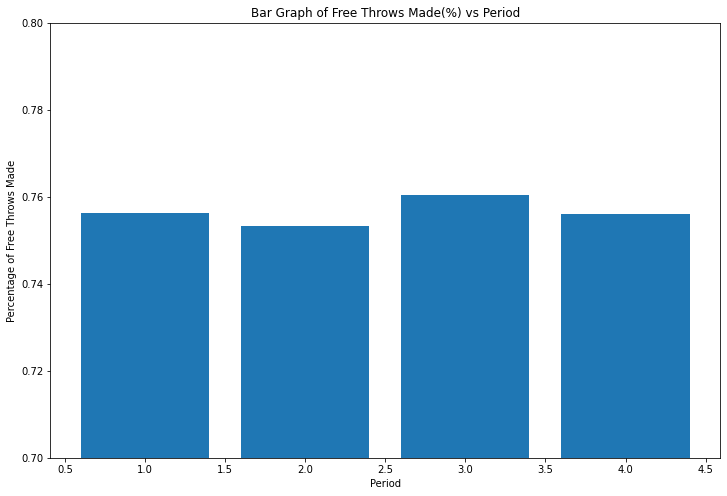

In [41]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(df["period"].unique()[:4], (df.groupby("period")["shot_made"].sum() / df.groupby("period")["shot_made"].size())[:4])

plt.title("Bar Graph of Free Throws Made(%) vs Period")
plt.xlabel("Period")
plt.ylabel("Percentage of Free Throws Made")
plt.ylim(.7, .8)

# plt.grid()
plt.show()

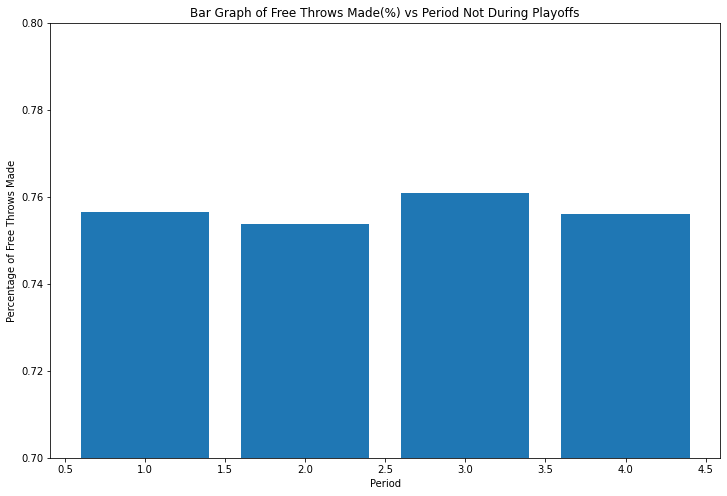

In [42]:
df_playoffs = df[df["playoffs"] == 0]
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(df_playoffs["period"].unique()[:4], (df_playoffs.groupby("period")["shot_made"].sum() / df_playoffs.groupby("period")["shot_made"].size())[:4])

plt.title("Bar Graph of Free Throws Made(%) vs Period Not During Playoffs")
plt.xlabel("Period")
plt.ylabel("Percentage of Free Throws Made")
plt.ylim(.7, .8)

# plt.grid()
plt.show()

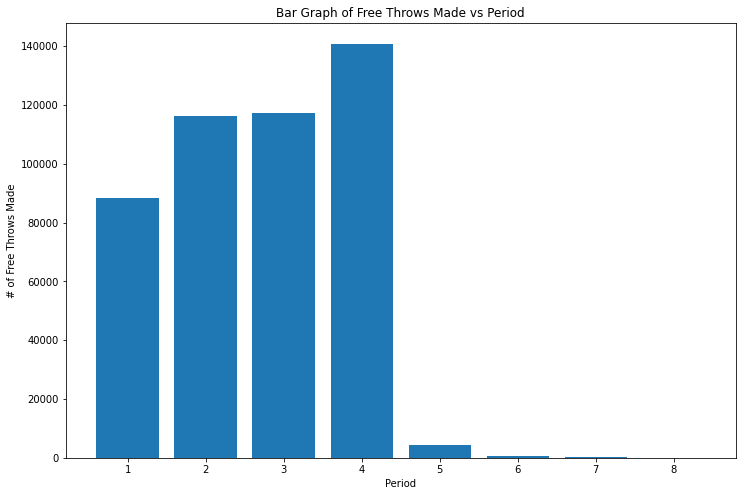

In [43]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(df["period"].unique(), df.groupby("period")["shot_made"].sum())

plt.title("Bar Graph of Free Throws Made vs Period")
plt.xlabel("Period")
plt.ylabel("# of Free Throws Made")

# plt.grid()
plt.show()

### Stats

Players who took the most shots:

In [44]:
df_pstats.sort_values(by=["taken"], ascending=False).head()

,season_start,player,taken,made,games,pct_made,gtr_avg
1308,2008,Dwight Howard,1078,648,103,0.601113,False
1310,2010,Dwight Howard,1006,607,85,0.603380,False
1849,2014,James Harden,1002,878,97,0.876248,True
1307,2007,Dwight Howard,983,576,93,0.585961,False
1309,2009,Dwight Howard,977,567,97,0.580348,False


Players who made the most shots:

In [45]:
df_pstats.sort_values(by=["made"], ascending=False).head()

,season_start,player,taken,made,games,pct_made,gtr_avg
1849,2014,James Harden,1002,878,97,0.876248,True
2483,2013,Kevin Durant,968,835,100,0.862603,True
2479,2009,Kevin Durant,902,810,87,0.898004,True
2557,2007,Kobe Bryant,931,776,99,0.833512,True
2482,2012,Kevin Durant,861,771,92,0.895470,True


Players who have the best shot percentage (and took more than 50 shots):

In [46]:
df_pstats_took_50.sort_values(by=["pct_made"], ascending=False).head()

,season_start,player,taken,made,games,pct_made,gtr_avg
2297,2008,Jose Calderon,154,151,43,0.980519,True
3795,2013,Ryan Anderson,62,59,16,0.951613,True
3578,2008,Ray Allen,307,292,81,0.951140,True
550,2013,Brian Roberts,133,125,47,0.939850,True
4017,2010,Stephen Curry,227,212,63,0.933921,True


# Miscellaneous
Different unorganized code blocks that don't have a set category yet.

Experimental temporary graph thingies for inspiration

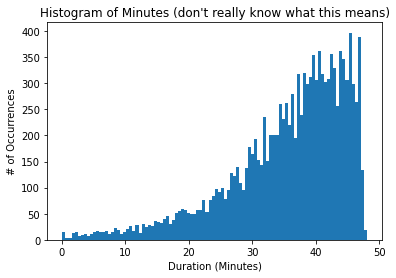

In [47]:
plt.hist(df_unique_games["minutes"], 100)

plt.title("Histogram of Minutes (don't really know what this means)")
plt.xlabel("Duration (Minutes)")
plt.ylabel("# of Occurrences")

plt.show()

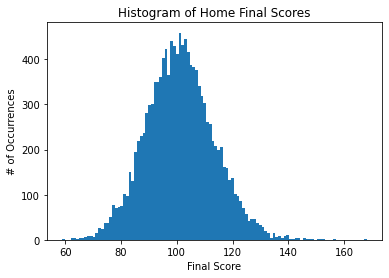

In [48]:
plt.hist(df_unique_games["home_final_score"], 110)

plt.title("Histogram of Home Final Scores")
plt.xlabel("Final Score")
plt.ylabel("# of Occurrences")

plt.show()

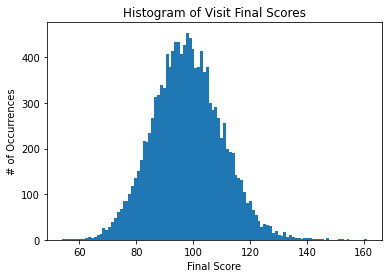

In [49]:
plt.hist(df_unique_games["visit_final_score"], 106)

plt.title("Histogram of Visit Final Scores")
plt.xlabel("Final Score")
plt.ylabel("# of Occurrences")

plt.show()

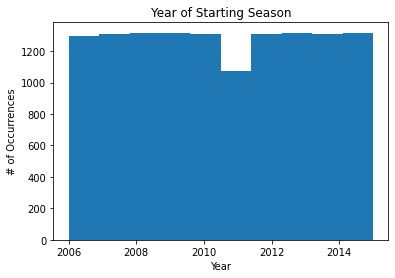

In [50]:
plt.hist(df_unique_games["season_start"]) # used histogram because bar graph was too hard

plt.title("Year of Starting Season")
plt.xlabel("Year")
plt.ylabel("# of Occurrences")

plt.show()